## FID

In [17]:
import tensorflow as tf
import numpy as np
from scipy.linalg import sqrtm

def calculate_fid(real_images, generated_images):
    """
    Calculate the Fréchet Inception Distance (FID) between real and generated images.
    :param real_images: Array of real images.
    :param generated_images: Array of generated images.
    :return: FID score.
    """
    # Load InceptionV3 model with correct input shape
    inception_model = tf.keras.applications.InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))

    # Preprocess images: Resize to 299x299 for the Inception model
    real_images = tf.image.resize(real_images, (299, 299))
    generated_images = tf.image.resize(generated_images, (299, 299))

    # Convert images to numpy array
    real_images = real_images.numpy()
    generated_images = generated_images.numpy()

    # Get the features from InceptionV3
    real_features = inception_model.predict(real_images)
    generated_features = inception_model.predict(generated_images)

    # Calculate mean and covariance statistics
    mu1, sigma1 = real_features.mean(axis=0), np.cov(real_features, rowvar=False)
    mu2, sigma2 = generated_features.mean(axis=0), np.cov(generated_features, rowvar=False)

    # Calculate the Fréchet distance
    ssdiff = np.sum((mu1 - mu2)**2)
    covmean = sqrtm(sigma1.dot(sigma2))

    # Check for numerical stability
    if np.iscomplexobj(covmean):
        covmean = covmean.real

    fid = ssdiff + np.trace(sigma1 + sigma2 - 2 * covmean)
    return fid


## Conditional GAN - SketchToImage

Gen Loss: 1.52271271 Disc Loss: 1.91983283 Real Accuracy: 0.09375 Fake Accuracy: 0.5625
Epoch: 1/100, Batch: 1/32
Gen Loss: 1.2902925 Disc Loss: 2.82645464 Real Accuracy: 0.96875 Fake Accuracy: 0.21875
Epoch: 1/100, Batch: 2/32
Gen Loss: 1.33339524 Disc Loss: 3.24723673 Real Accuracy: 1 Fake Accuracy: 0.28125
Epoch: 1/100, Batch: 3/32
Gen Loss: 2.08727789 Disc Loss: 2.36604714 Real Accuracy: 1 Fake Accuracy: 0.375
Epoch: 1/100, Batch: 4/32
Gen Loss: 2.03366923 Disc Loss: 2.54975533 Real Accuracy: 0.96875 Fake Accuracy: 0.5
Epoch: 1/100, Batch: 5/32
Gen Loss: 1.58939242 Disc Loss: 2.36702728 Real Accuracy: 0.875 Fake Accuracy: 0.34375
Epoch: 1/100, Batch: 6/32
Gen Loss: 1.18515277 Disc Loss: 2.9025116 Real Accuracy: 0.75 Fake Accuracy: 0.25
Epoch: 1/100, Batch: 7/32
Gen Loss: 1.59993565 Disc Loss: 2.76342821 Real Accuracy: 0.8125 Fake Accuracy: 0.40625
Epoch: 1/100, Batch: 8/32
Gen Loss: 1.62184834 Disc Loss: 2.48386025 Real Accuracy: 0.78125 Fake Accuracy: 0.34375
Epoch: 1/100, Batch: 

1/1 [==============================] - 1s 1s/step
FID score after epoch 5: 321.6897
Gen Loss: 3.74332333 Disc Loss: 0.71202594 Real Accuracy: 0.71875 Fake Accuracy: 1
Epoch: 6/100, Batch: 1/32
Gen Loss: 0.843180954 Disc Loss: 1.2021209 Real Accuracy: 0.9375 Fake Accuracy: 0.28125
Epoch: 6/100, Batch: 2/32
Gen Loss: 1.9640404 Disc Loss: 0.869430304 Real Accuracy: 0.71875 Fake Accuracy: 1
Epoch: 6/100, Batch: 3/32
Gen Loss: 1.82972622 Disc Loss: 0.934207797 Real Accuracy: 0.6875 Fake Accuracy: 1
Epoch: 6/100, Batch: 4/32
Gen Loss: 0.92751807 Disc Loss: 1.38891602 Real Accuracy: 0.71875 Fake Accuracy: 0.28125
Epoch: 6/100, Batch: 5/32
Gen Loss: 1.89701319 Disc Loss: 1.26601315 Real Accuracy: 0.53125 Fake Accuracy: 0.96875
Epoch: 6/100, Batch: 6/32
Gen Loss: 2.17592645 Disc Loss: 1.0616864 Real Accuracy: 0.5625 Fake Accuracy: 1
Epoch: 6/100, Batch: 7/32
Gen Loss: 1.6117003 Disc Loss: 0.646069229 Real Accuracy: 0.84375 Fake Accuracy: 0.90625
Epoch: 6/100, Batch: 8/32
Gen Loss: 1.06117773 Di

1/1 [==============================] - 1s 1s/step
FID score after epoch 6: 334.8378
Gen Loss: 1.07622063 Disc Loss: 0.713611603 Real Accuracy: 1 Fake Accuracy: 0.59375
Epoch: 7/100, Batch: 1/32
Gen Loss: 1.30835295 Disc Loss: 0.74306941 Real Accuracy: 0.96875 Fake Accuracy: 0.78125
Epoch: 7/100, Batch: 2/32
Gen Loss: 3.31675172 Disc Loss: 0.861053228 Real Accuracy: 0.5 Fake Accuracy: 1
Epoch: 7/100, Batch: 3/32
Gen Loss: 2.41408873 Disc Loss: 0.482238442 Real Accuracy: 0.90625 Fake Accuracy: 1
Epoch: 7/100, Batch: 4/32
Gen Loss: 1.51270819 Disc Loss: 0.577886283 Real Accuracy: 0.96875 Fake Accuracy: 0.90625
Epoch: 7/100, Batch: 5/32
Gen Loss: 0.659494519 Disc Loss: 1.46603501 Real Accuracy: 0.90625 Fake Accuracy: 0.03125
Epoch: 7/100, Batch: 6/32
Gen Loss: 3.16771913 Disc Loss: 2.30128741 Real Accuracy: 0.25 Fake Accuracy: 1
Epoch: 7/100, Batch: 7/32
Gen Loss: 3.58951426 Disc Loss: 0.428979248 Real Accuracy: 0.8125 Fake Accuracy: 1
Epoch: 7/100, Batch: 8/32
Gen Loss: 2.12402463 Disc Lo

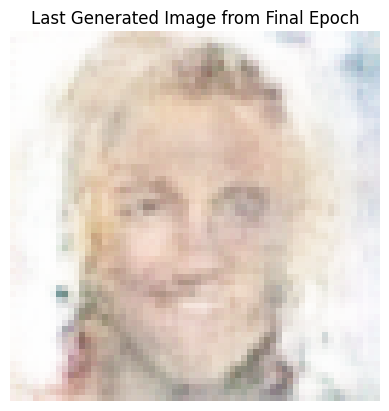

Training completed!


In [18]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_addons as tfa  # For Instance Normalization
import matplotlib.pyplot as plt

# Hyperparameters
learning_rate = 2e-4  # Lower learning rate for more stable training
beta1 = 0.5
beta2 = 0.999
batch_size = 32
EPOCHS = 100
noise_dim = 100  # Dimension of the noise vector
image_shape = (64, 64, 3)  # Shape of the generated images
sketch_shape = (64, 64, 1)  # Shape of the input sketches
output_dir = "generated_images"  # Directory to save generated images

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Pixel loss (L1 loss) and Contextual loss definitions
pixel_loss = tf.keras.losses.MeanAbsoluteError()  # L1 loss for pixel-wise difference
contextual_loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)  # Binary cross-entropy

# Instance Normalization layer
def instance_norm():
    return tfa.layers.InstanceNormalization(axis=-1)

# Generator model with Instance Normalization
def build_generator():
    noise_input = layers.Input(shape=(noise_dim,))
    sketch_input = layers.Input(shape=sketch_shape)  # Assuming sketches are grayscale

    x = layers.Dense(256 * 16 * 16)(noise_input)
    x = layers.Reshape((16, 16, 256))(x)
    x = instance_norm()(x)
    x = layers.LeakyReLU()(x)

    x = layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same')(x)
    x = instance_norm()(x)
    x = layers.LeakyReLU()(x)

    x = layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same')(x)
    x = instance_norm()(x)
    x = layers.LeakyReLU()(x)

    x = layers.Concatenate()([x, sketch_input])
    x = layers.Conv2D(3, kernel_size=7, padding='same', activation='tanh')(x)

    model = tf.keras.Model(inputs=[noise_input, sketch_input], outputs=x)
    return model

generator = build_generator()

# Discriminator model with Instance Normalization
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, kernel_size=4, strides=2, padding='same', input_shape=[64, 64, 3]))
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2D(128, kernel_size=4, strides=2, padding='same'))
    model.add(instance_norm())
    model.add(layers.LeakyReLU())

    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

discriminator = build_discriminator()

# Optimizers
generator_optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=beta1, beta_2=beta2)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=beta1, beta_2=beta2)

# Total loss combining pixel, contextual, and generator's adversarial loss
def total_loss(real_images, generated_images, fake_output):
    pixel_loss_value = pixel_loss(real_images, generated_images)
    contextual_loss_value = contextual_loss(tf.ones_like(fake_output), fake_output)
    total_gen_loss = pixel_loss_value + contextual_loss_value
    return total_gen_loss

# Training step with updated loss function and instance normalization
@tf.function
def train_step(sketches, real_images):
    batch_size = tf.shape(real_images)[0]
    noise = tf.random.normal([batch_size, noise_dim])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator([noise, sketches], training=True)
        
        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(generated_images, training=True)
        
        gen_loss = total_loss(real_images, generated_images, fake_output)
        
        disc_loss_real = contextual_loss(tf.ones_like(real_output), real_output)
        disc_loss_fake = contextual_loss(tf.zeros_like(fake_output), fake_output)
        disc_loss = disc_loss_real + disc_loss_fake
        
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    # Calculate accuracy
    real_labels = tf.ones_like(real_output)
    fake_labels = tf.zeros_like(fake_output)

    # Calculate discriminator accuracy
    real_accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.round(real_output), real_labels), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.round(fake_output), fake_labels), tf.float32))
    
    tf.print("Gen Loss:", gen_loss, "Disc Loss:", disc_loss, 
             "Real Accuracy:", real_accuracy, "Fake Accuracy:", fake_accuracy)

# Prepare dataset
# Load sketches and images from specified folders
def load_data(sketch_dir, image_dir):
    sketch_images = []
    real_images = []
    
    for sketch_file in os.listdir(sketch_dir):
        if sketch_file.endswith(".png") or sketch_file.endswith(".jpg"):
            sketch_path = os.path.join(sketch_dir, sketch_file)
            image_path = os.path.join(image_dir, sketch_file)  # Assuming matching filenames
            
            # Load and preprocess sketch
            sketch = tf.keras.preprocessing.image.load_img(sketch_path, color_mode='grayscale', target_size=(64, 64))
            sketch = tf.keras.preprocessing.image.img_to_array(sketch) / 255.0
            sketch_images.append(sketch)

            # Load and preprocess real image
            real_image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
            real_image = tf.keras.preprocessing.image.img_to_array(real_image) / 255.0
            real_images.append(real_image)

    return np.array(sketch_images), np.array(real_images)

sketches_folder = '/Users/zainabaslam/Local Docs/GenAI-A2/Dataset/train/sketches'  # Directory containing sketches
images_folder = '/Users/zainabaslam/Local Docs/GenAI-A2/Dataset/train/photos'     
train_sketches, train_images = load_data(sketches_folder, images_folder)

train_dataset = tf.data.Dataset.from_tensor_slices((train_sketches, train_images))
train_dataset = train_dataset.shuffle(len(train_sketches)).batch(batch_size)

# Fixed batch size
fixed_batch_size = 32  # Set fixed batch size for training


# Training loop
for epoch in range(EPOCHS):
    for batch_num, (sketches, real_images) in enumerate(train_dataset.take(32)):  # Only take 32 batches
        train_step(sketches, real_images)

        # Display batch number
        tf.print(f"Epoch: {epoch + 1}/{EPOCHS}, Batch: {batch_num + 1}/32")

    print(f"Epoch {epoch + 1}/{EPOCHS} completed.")

    # Save generated images after each epoch
    noise = tf.random.normal([batch_size, noise_dim])
    generated_images = generator([noise, train_sketches[:batch_size]], training=False)
    
    # Save the generated images
    for i in range(batch_size):
        img_path = os.path.join(output_dir, f"generated_image_epoch_{epoch + 1}_{i + 1}.png")
        # Scale to [0, 1] before saving
        tf.keras.preprocessing.image.save_img(img_path, (generated_images[i] * 0.5) + 0.5)  
        
    # Calculate and print FID score after each epoch
    fid_score = calculate_fid(train_images[:batch_size], generated_images)
    print(f"FID score after epoch {epoch + 1}: {fid_score:.4f}")
    
# Plot only the last generated image from the last epoch
last_generated_image = generated_images[-4]  # Get the last generated image

# Display the image
plt.imshow((last_generated_image * 0.5) + 0.5)  # Scale back to [0, 1]
plt.axis('off')  # Turn off axis
plt.title('Last Generated Image from Final Epoch')
plt.show()

print("Training completed!")

In [28]:
# Save the entire generator model
generator.save('generator_model.h5')

# Save the entire discriminator model
discriminator.save('discriminator_model.h5')


/opt/anaconda3/envs/panda/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
# Save the entire generator model
generator.save('generator_model.keras')

# Save the entire discriminator model
discriminator.save('discriminator_model.keras')


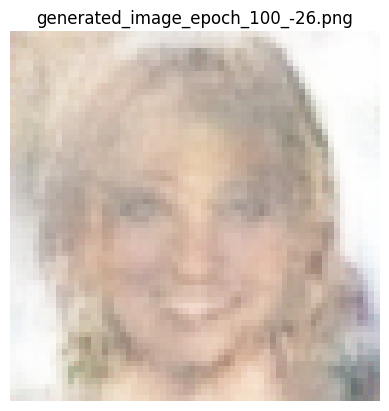

Training completed!


In [27]:
# Specify the index of the image you want to display
image_index = 26  # This corresponds to the 15th last generated image
image_name = f"generated_image_epoch_{EPOCHS}_{-image_index}.png"  # Format the image name

# Plot only the specified generated image from the last epoch
specified_generated_image = generated_images[image_index]  # Get the specified generated image

# Display the image
plt.imshow((specified_generated_image * 0.5) + 0.5)  # Scale back to [0, 1]
plt.axis('off')  # Turn off axis
plt.title(image_name)  # Use the specified image name as the title
plt.show()

print("Training completed!")
